def my_function(fname,iname)

print(fname+**+iname)

my_function(emil,refsnes)

Here,fname and iname are **parameters** of this function.and emil and refsnes are **argument**

Model Parameter:
>there are parameters that are derived from the dataset,that represented in making prediction classification and etc.
we can't control it.

Hyperparameter:
>parameters that are adjustable in order to obtain an improved model with optimal performance

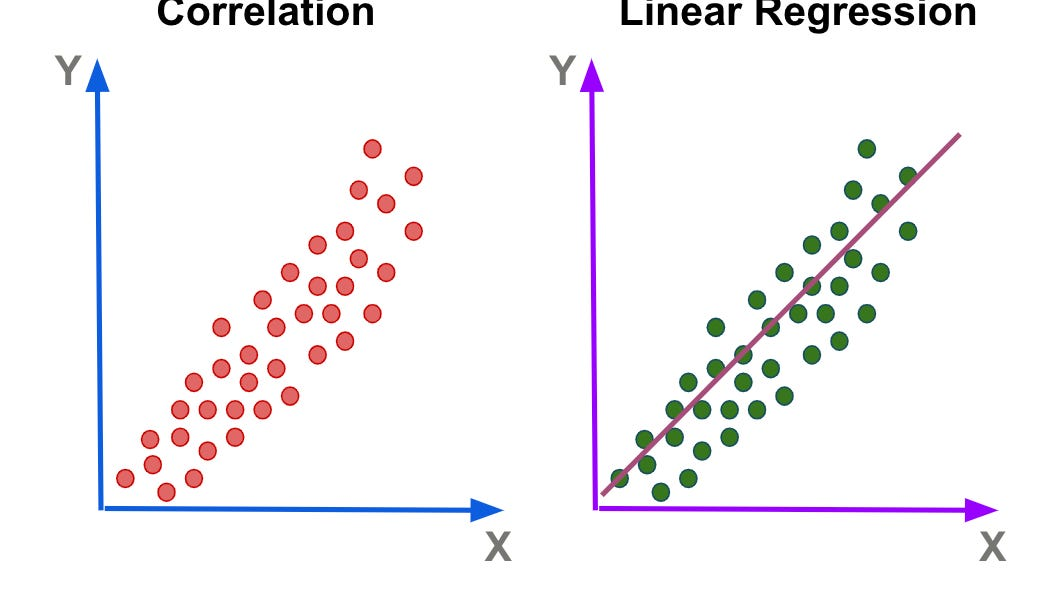

There are two methods to use Hyperparameter.

### 1.GridSearch CV:
>*implementation of GridSearch is done through Scikit-Learn library.

>*the computational time would be long due to cross validation.

>*less manual efforts by avoiding 'n' number of lines of code

**Cross validation**:Tecnique in ML to evaluate the performance of the model.It divides data into multiple folds ,using one of these folds as validation set,and training the model on remaining folds





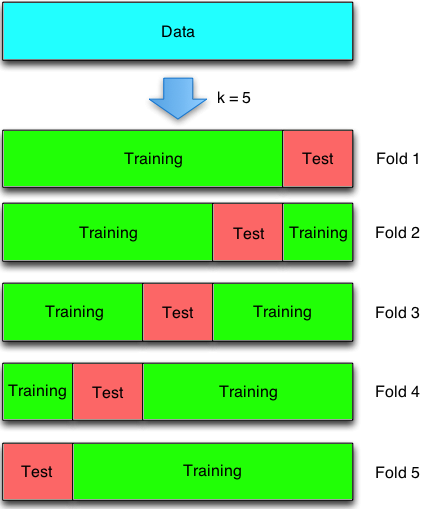

### 2.RandomSearch CV:
> RandomSearch, in a given grid the list of hypoparameters are trained our model on a random combination of given hyperparameters.


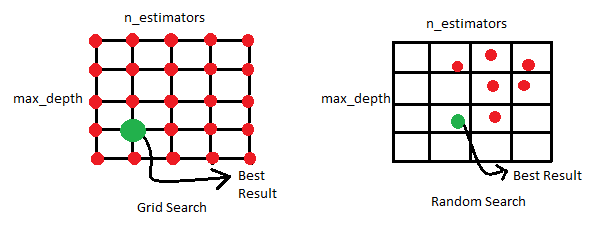

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ML/Hyper Parameter tuning/Copy_of_diabetes_(1)_(2)_(1)_(1).csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
cls=KNeighborsClassifier(n_neighbors=5)
cls.fit(x_train,y_train)
y_pred=cls.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7552083333333334

In [ ]:
help(cls)

Help on KNeighborsClassifier in module sklearn.neighbors._classification object:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neigh

In [ ]:
cls1=KNeighborsClassifier()

### GridSearch CV

In [ ]:
params={'n_neighbors':[3,5,7,9,11,13],'weights':['uniform','distance']}
clf=GridSearchCV(cls1,params,cv=10,scoring='accuracy')
clf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
clf.best_params_

{'n_neighbors': 9, 'weights': 'uniform'}

In [ ]:
clf2=KNeighborsClassifier(n_neighbors=9,weights='uniform')
clf2.fit(x_train,y_train)
y_pred=clf2.predict(x_test)
accuracy_score(y_test,y_pred)

0.7708333333333334

#### RandomSearch CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint

In [ ]:
clf=RandomForestClassifier(n_estimators=50)

In [ ]:
help(clf)

Help on RandomForestClassifier in module sklearn.ensemble._forest object:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------

In [ ]:
param_dist={'max_depth':[3,4,5,6,None],
           'max_features':sp_randint(1,11),
           'min_samples_split':sp_randint(2,11),
           'criterion':['gini','entropy']}

In [ ]:
randomCV=RandomizedSearchCV(clf,param_distributions=param_dist,cv=3)
randomCV.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=50),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79753eb36d70>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79753eb344c0>})

In [ ]:
print(randomCV.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 3, 'min_samples_split': 9}


In [ ]:
print(randomCV.score(x_test,y_test))

0.796875
